# Import

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf

# Check Folder

In [2]:
fashion_dataset_path="Dataset_Split/train"
os.listdir(fashion_dataset_path)

['black',
 'blue',
 'brown',
 'green',
 'grey',
 'orange',
 'red',
 'violet',
 'white',
 'yellow']

# Build Model

In [3]:
#medium-medium model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150,150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
        
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 85264)             0         
                                                                 
 dense (Dense)               (None, 32)                2728480   
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                        

In [4]:
from tensorflow.keras.optimizers import Adam
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [5]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "Dataset_Split/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      fill_mode='nearest')

VALIDATION_DIR = "Dataset_Split/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=15
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=15
)

Found 530 images belonging to 10 classes.
Found 64 images belonging to 10 classes.


In [41]:
# Train the model
history = model.fit(train_generator, epochs=30, validation_data = validation_generator)

Epoch 1/30
36/36 [==============================] - 5s 110ms/step - loss: 1.9389 - accuracy: 0.3296 - val_loss: 1.6268 - val_accuracy: 0.4062
Epoch 2/30
36/36 [==============================] - 3s 90ms/step - loss: 1.3618 - accuracy: 0.5122 - val_loss: 1.0422 - val_accuracy: 0.6719
Epoch 3/30
36/36 [==============================] - 3s 92ms/step - loss: 1.0726 - accuracy: 0.6234 - val_loss: 0.8709 - val_accuracy: 0.6719
Epoch 4/30
36/36 [==============================] - 3s 91ms/step - loss: 0.8368 - accuracy: 0.6836 - val_loss: 0.9455 - val_accuracy: 0.6719
Epoch 5/30
36/36 [==============================] - 3s 93ms/step - loss: 0.7828 - accuracy: 0.7232 - val_loss: 1.1908 - val_accuracy: 0.6406
Epoch 6/30
36/36 [==============================] - 3s 90ms/step - loss: 0.7204 - accuracy: 0.7476 - val_loss: 0.7768 - val_accuracy: 0.7344
Epoch 7/30
36/36 [==============================] - 3s 88ms/step - loss: 0.6598 - accuracy: 0.7514 - val_loss: 1.1466 - val_accuracy: 0.7656
Epoch 8/30
3

# Evaluate

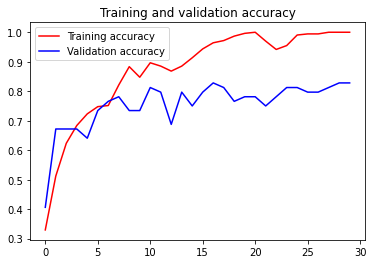

<Figure size 432x288 with 0 Axes>

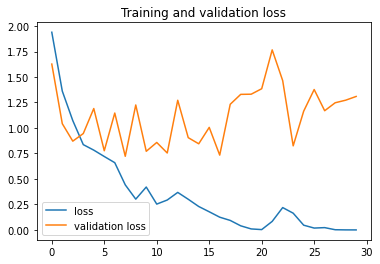

In [42]:
def plot_history(history):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()
    
    # plt.plot(epochs, acc)
    # plt.plot(epochs, val_acc)
    # plt.title('Training and validation accuracy')
    # plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    
    plt.show()
    
plot_history(history)

# Evaluate on new images

In [43]:
label_map = (train_generator.class_indices)
print(label_map)

{'black': 0, 'blue': 1, 'brown': 2, 'green': 3, 'grey': 4, 'orange': 5, 'red': 6, 'violet': 7, 'white': 8, 'yellow': 9}


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir=VALIDATION_DIR
test_datagen = ImageDataGenerator()

# test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=3, class_mode='categorical')
# # X_test, y_test = next(test_generator)

# Testresults = full_model.evaluate(test_generator)
# print("test loss, test acc:", Testresults)

In [47]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), class_mode='categorical')
X_test, y_test = next(test_generator)
X_test=X_test/255
preds = model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)
print('')

names = ["Blue","Green","Indigo","Orange","Red","Voilet","Yellow"]

for i in range(0,4):
    class_labels2=[names[i] for i,prob in enumerate(y_test[i]) if prob > 0.0]
    print("Predicted:",names[np.argmax(preds[i])])
    ans = max(list(zip(preds[i],names)))
    # print("Given input file is of {} color with prediction percentage {:2f}%".format(ans[1],ans[0]*100))
    print("True:",names[np.argmax(y_test[i])])
    print('')



Found 64 images belonging to 10 classes.

Predicted: Indigo
True: Indigo

Predicted: Green
True: Green

Predicted: Blue
True: Blue

Predicted: Blue
True: Blue



# Save Model

In [48]:
# Save the entire model as my_model in .h5 format
# !mkdir saved_model
model.save('my_model.h5')

In [12]:
# Save the entire model as my_model 
# !mkdir saved_model
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


# Load Model

In [6]:
# Recreate the exact same model, including its weights and the optimizer
load_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
load_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 85264)             0         
                                                                 
 dense_18 (Dense)            (None, 32)                2728480   
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                      

# Load Model Test

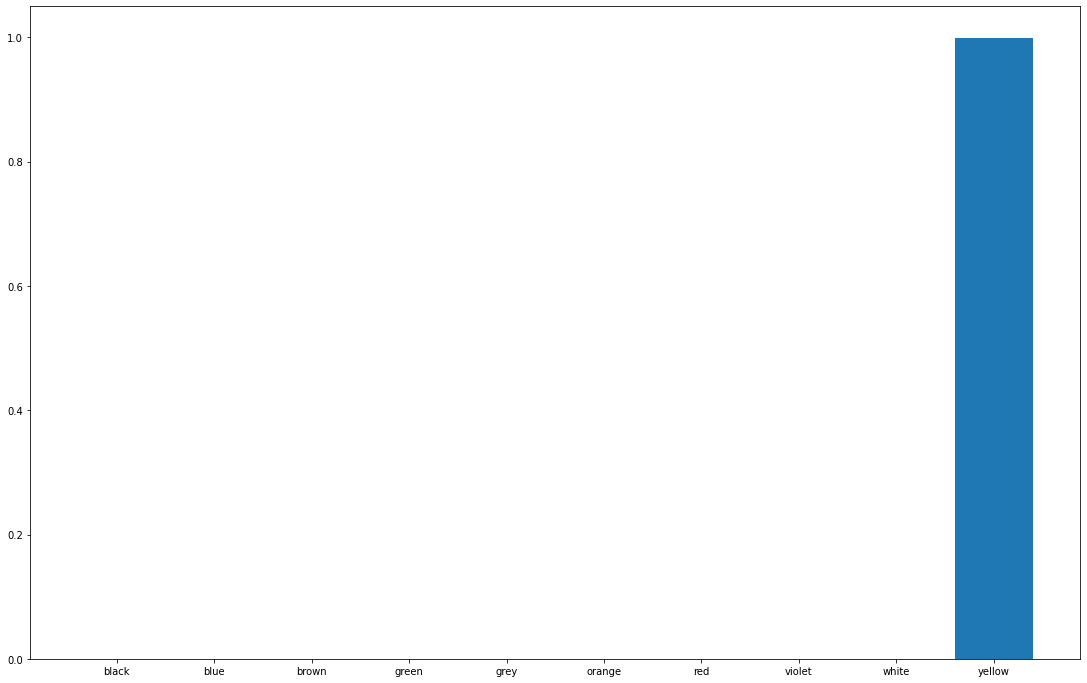

In [7]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150,150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("my_model.h5")

    # image path
    img_path = 'Dataset_Split/val/yellow/26413img_00000012.jpg'

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict_step(new_image)
    
    # print(pred[0])
    
    names = ['black', 'blue', 'brown', 'green', 'grey', 'orange', 'red', 'violet', 'white', 'yellow']
    values = np.array(pred[0])

    plt.figure(figsize=(64, 12))

    plt.subplot(131)
    plt.bar(names, values)
    # plt.suptitle('Categorical Plotting')
    plt.show()
 


In [8]:
# TRAINING_DIR = "Dataset_Split/train"
# VALIDATION_DIR
GABUNG_DIR = "Dataset"
test_dir=GABUNG_DIR
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150),batch_size=595, class_mode='categorical')
X_test, y_test = next(test_generator)
X_test=X_test/255
preds = model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)
print('')

names = ['black', 'blue', 'brown', 'green', 'grey', 'orange', 'red', 'violet', 'white', 'yellow']

for i in range(0,8):
    class_labels2=[names[i] for i,prob in enumerate(y_test[i]) if prob > 0.0]
    print("Predicted:",names[np.argmax(preds[i])])
    print("True:",names[np.argmax(y_test[i])])
    print('')



Found 594 images belonging to 10 classes.

Predicted: orange
True: orange

Predicted: black
True: black

Predicted: red
True: red

Predicted: red
True: red

Predicted: red
True: red

Predicted: brown
True: brown

Predicted: red
True: red

Predicted: black
True: black



In [68]:
predicted_categories = tf.argmax(preds, axis=1)

In [69]:
print(predicted_categories)

tf.Tensor(
[0 7 2 0 1 0 0 8 6 2 6 8 4 1 0 0 2 2 1 9 4 5 0 7 2 4 0 0 0 0 8 0 4 2 6 2 2
 1 0 4 4 6 9 9 3 6 1 8 6 2 2 4 6 5 1 6 8 0 5 9 5 2 9 6 6 6 6 1 6 2 6 9 2 6
 6 6 4 7 2 2 1 4 2 4 7 8 1 5 5 6 0 0 3 0 6 1 1 0 0 0 5 5 6 3 2 1 6 0 6 5 9
 2 9 6 3 1 2 2 1 0 8 8 1 4 2 8 0 6 2 3 9 9 6 2 0 2 6 1 6 7 6 0 0 0 0 6 0 6
 6 9 7 6 2 1 1 8 9 0 1 0 6 9 4 4 5 6 6 4 8 8 1 9 9 1 0 4 4 7 2 0 8 1 6 5 6
 6 6 8 0 0 1 8 6 2 0 1 5 0 6 0 9 0 6 4 3 2 6 7 6 2 6 2 0 0 0 6 8 6 6 2 8 0
 6 5 6 1 6 0 6 2 1 0 3 6 1 4 2 1 8 6 3 9 7 0 5 8 0 6 1 8 1 1 7 5 0 0 1 6 8
 6 1 8 0 2 0 9 3 2 6 2 4 9 2 6 0 0 0 3 1 2 7 2 2 9 6 4 6 2 6 2 4 2 6 6 6 5
 8 1 8 1 6 5 2 3 0 1 6 5 6 0 6 6 3 6 0 3 0 6 0 2 5 0 4 6 2 1 1 5 6 7 6 6 8
 0 0 8 0 6 6 8 2 2 6 3 6 5 6 6 0 2 6 2 6 4 6 5 0 0 0 0 1 6 0 6 6 8 6 0 6 1
 1 5 1 8 1 9 2 5 6 4 4 0 8 0 6 6 0 0 6 0 5 6 2 4 3 0 9 1 0 0 1 4 5 4 6 6 6
 3 0 6 2 9 0 6 0 2 7 1 7 0 3 3 6 6 3 7 0 6 4 0 2 2 6 2 2 0 2 2 0 9 4 6 6 2
 8 1 6 6 2 1 8 0 5 4 2 8 5 9 7 6 2 5 2 1 8 6 9 7 6 2 0 2 1 0 7 6 2 0 3 0 6
 2 6 4 0 6 6 4

In [70]:
true_categories = tf.argmax(y_test, axis=1)

In [71]:
print(true_categories)

tf.Tensor(
[0 7 2 0 1 0 0 8 6 2 6 8 4 1 0 0 2 2 1 9 4 5 0 7 2 4 0 0 0 0 8 0 3 2 6 0 2
 1 0 4 4 6 9 9 3 6 1 8 6 2 2 4 6 5 1 6 8 0 5 9 5 2 9 6 6 6 6 1 6 2 6 9 2 6
 6 6 4 7 2 2 1 4 2 4 7 8 1 5 5 6 0 0 3 0 6 1 1 0 0 0 5 5 6 3 2 1 6 0 6 5 9
 2 9 6 3 1 2 2 1 0 8 8 1 4 2 8 0 6 2 3 9 9 6 2 0 2 6 1 6 7 6 0 0 0 0 6 0 6
 6 9 7 6 2 1 1 2 9 0 1 0 6 9 4 4 5 6 6 4 8 8 1 3 9 1 0 4 4 7 2 0 8 1 6 5 6
 6 6 8 0 0 1 8 6 2 0 1 6 0 6 0 9 0 6 4 1 2 6 7 6 2 6 2 0 0 0 6 8 6 6 2 8 0
 6 5 6 1 6 0 6 2 1 0 3 6 1 4 2 1 8 6 3 9 7 0 5 7 0 6 1 8 1 1 7 5 0 0 1 6 8
 6 1 8 0 2 0 9 3 2 6 2 4 9 2 6 0 0 0 3 1 2 7 2 2 9 6 4 6 2 6 2 4 2 6 6 6 5
 8 1 8 1 6 5 2 3 0 1 6 5 6 0 6 6 3 6 0 3 0 6 2 2 5 4 4 6 2 1 1 5 6 7 6 6 8
 0 0 8 0 6 6 8 2 2 6 3 6 5 6 6 0 2 6 2 6 4 6 5 0 0 0 0 1 6 0 6 6 8 6 0 6 1
 1 5 1 8 1 9 2 5 6 4 4 0 8 0 6 6 0 0 6 0 5 6 2 4 3 0 9 1 0 0 1 4 5 4 6 6 6
 3 0 6 2 9 0 6 0 2 7 1 7 0 3 3 6 6 3 7 0 6 4 0 2 2 6 2 2 0 2 2 0 9 4 6 6 2
 8 1 6 6 2 1 8 0 5 4 2 8 5 9 7 6 2 5 2 1 8 6 9 7 6 2 0 2 1 0 7 6 2 0 3 0 6
 2 6 4 0 6 6 4

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted_categories, true_categories)

array([[114,   0,   1,   0,   1,   0,   0,   0,   0,   0],
       [  0,  63,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,  81,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,  27,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,  33,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  36,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 135,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  24,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   2,  38,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,  33]], dtype=int64)

In [73]:
cf_matrix = confusion_matrix(predicted_categories, true_categories)
print(cf_matrix)

[[114   0   1   0   1   0   0   0   0   0]
 [  0  63   0   0   0   0   0   0   0   0]
 [  1   0  81   0   0   0   0   0   0   0]
 [  0   1   0  27   0   0   0   0   0   0]
 [  0   0   0   1  33   0   0   0   0   0]
 [  0   0   0   0   0  36   1   0   0   0]
 [  0   0   0   0   0   1 135   0   0   0]
 [  0   0   0   0   0   0   0  24   0   0]
 [  0   0   1   0   0   0   0   2  38   0]
 [  0   0   0   1   0   0   0   0   0  33]]


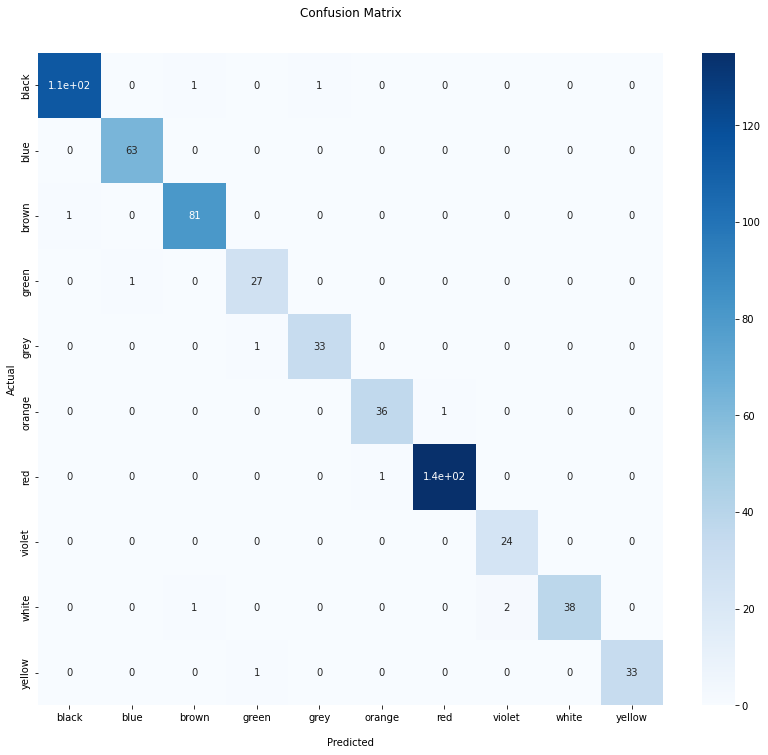

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['black', 'blue', 'brown', 'green', 'grey', 'orange', 'red', 'violet', 'white', 'yellow'])
ax.yaxis.set_ticklabels(['black', 'blue', 'brown', 'green', 'grey', 'orange', 'red', 'violet', 'white', 'yellow'])

## Display the visualization of the Confusion Matrix.
plt.show()